# **Exploratory Data Analysis for Assignment 04 LSTM Time Series Chicago**

In [5]:
# Data Analysis Libraries
import numpy 
import pandas 
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis Libraries
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(
    action="ignore",
    module= "scipy",    
    message="^internal gelsd"
)
warnings.filterwarnings(
    action="ignore",
    module= "seaborn",    
    message="^internal gelsd"
)

In [6]:
dataframe = pandas.read_csv('/content/sample_data/chi.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CHXRSA  420 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


### We have 420 monthly observations from January 1987 to December 2021 in the city of Chicago

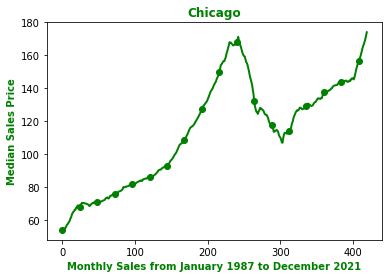

In [9]:
dataset = pandas.read_csv('/content/sample_data/chi.csv', usecols=[1], engine='python')
plt.plot(dataframe, linewidth=2, markevery=24, marker='o', color='g')
plt.ylabel('Median Sales Price', fontweight='bold', color='g')
plt.xlabel('Monthly Sales from January 1987 to December 2021',fontweight='bold', color='g')
plt.title('Chicago', fontweight='bold', color='g')
plt.show()

(array([17., 65., 50., 26., 33., 49., 63., 61., 27., 29.]),
 array([ 54.20647876,  66.19087981,  78.17528087,  90.15968192,
        102.14408298, 114.12848403, 126.11288508, 138.09728614,
        150.08168719, 162.06608825, 174.0504893 ]),
 <a list of 10 Patch objects>)

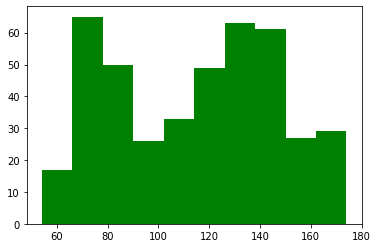

In [10]:
plt.hist(dataframe['CHXRSA'], color = 'g')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


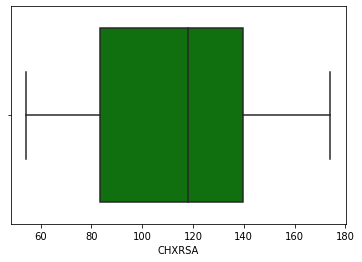

In [11]:
sns.boxplot(dataframe['CHXRSA'], color='g')

### **A visual check shows no normal distribution.**

In [12]:
# test run for stationarity
result = adfuller(dataframe['CHXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))



ADF Statistic: -0.624823
p-value: 0.865274
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


**We fail to reject the null hypothesis so dataset is non - stationary because p - value is greater than 0.05**

**However, the ADF Statistic is close to zero and the cascade of critical values show that the non - stationary is not very strong.**

**There is some stable stationary parts of the dataset.**

In [13]:
# normality test
stat, p = jarque_bera(dataframe['CHXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=24.667, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:
dataframe['CHXRSA'].skew(), dataframe['CHXRSA'].kurt()

(-0.06942695017548534, -1.1788814226796223)

**In a similar fashion to stationarity, the dataset is non - normal, but the JB statistic is not extreme.**

**There is some level of normality in the dataset.**

**Both the third and fourth moments of distribution are near zero.**

**Let's do some cross validation below.**

In [71]:
half_dataframe = dataframe.iloc[:72,:]
half_dataframe.reset_index()
half_dataframe.describe()

,CHXRSA
count,72.000
mean,68.248
std,5.816
min,54.206
25%,66.530
50%,70.215
75%,71.443
max,75.911


**The first sixth of the dataset from January 1987 to December 1998 will be retested statistically.**

In [72]:
half_dataframe.head()

,CHXRSA
0,54.206
1,55.227
2,54.811
3,54.802
4,55.477


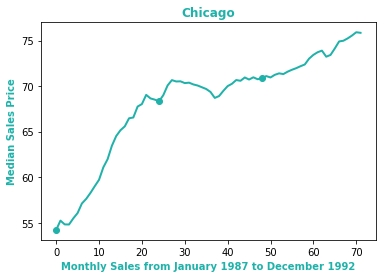

In [73]:
plt.plot(half_dataframe, linewidth=2, markevery=24, marker='o', color='lightseagreen')
plt.ylabel('Median Sales Price', fontweight='bold', color='lightseagreen')
plt.xlabel('Monthly Sales from January 1987 to December 1992',fontweight='bold', color='lightseagreen')
plt.title('Chicago', fontweight='bold', color='lightseagreen')
plt.show()

In [74]:
# test run for stationarity
result = adfuller(half_dataframe['CHXRSA'])

# print the results
print ('ADF Statistic: %f' % result[0])
print ('p-value: %f' % result[1])
print ('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

ADF Statistic: -3.817603
p-value: 0.002732
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590


**About the first sixth of the time series is stationary as the p-value is below the 5% and the ADF Statistic is not positive, but negative.**

In [75]:
# normality test
stat, p = jarque_bera(half_dataframe['CHXRSA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
 

Statistics=15.520, p=0.000
Sample does not look Gaussian (reject H0)


In [76]:
half_dataframe['CHXRSA'].skew(), half_dataframe['CHXRSA'].kurt()

(-1.154156634023024, 0.3641895121358818)

### **EDA Conclusion**

**The result of the Exploratory Data Analysis is a dataset that begins in a slightly non - normal distribution with the stability of a stationary times series, which is suitable for linear models.**

**A regime switch occurred three decades ago in 1992 as the common tendencies of an average with its variation become less stable with non – stationarity coupled with more non – normality leading to a possible struggle of linear models.**